# Svinge med den innebygde gyro-sensoren

Spike har en innebygget gyro-sensor som kan registrere bevegelse på selve Spike Hub. Den kan registrere bevegelse i alle akser, men for vår del er det z-aksen, eller yaw, som er den mest aktuelle å forholde seg til.

### Metoder som du trenger
Metoder for bevegelsessensor - brukes til å lese og nullstille verdier til gyrosensoren:


hub.motion_sensor.get_yaw_angle()
hub_motion_sensor.reset_yaw_angle()

Operator-funksjoner - sammenligner to verdier og gir en Boolean (True/False) som resultat

In [ ]:
greater_than_or_equal_to(a,b)

##  Forskjellige svinger

Siden roboten din har to hjul med hver sin motor kan man svinge på to forskjellige måter: dreie og spinne

### Dreie

Dreiing foregår ved at det ene hjulet kjører og at det andre hjulet står stille, og kan f.eks gjøres på denne måten:

In [ ]:
motor_pair.move_tank(1, unit='rotations', 0,50)

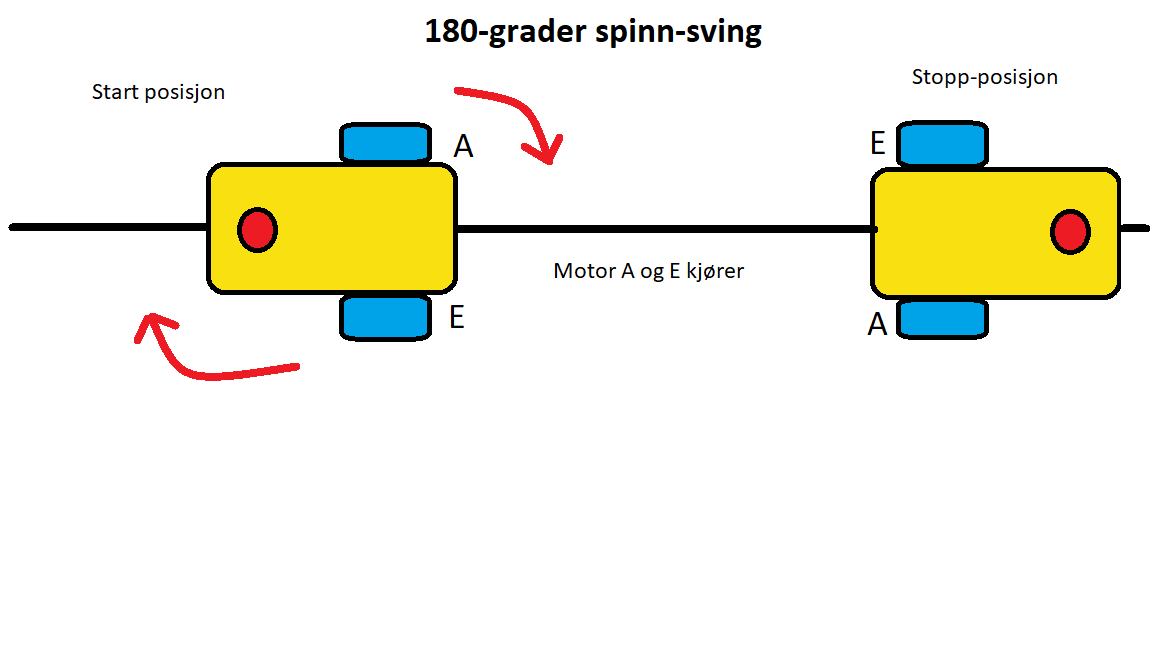

Her vil høyre hjul kjøre en rotasjon med en fart på 50.
Ved en dreiesving vil roboten flytte på seg en del.

### Spinne
Spinning foregår ved at det ene hjulet kjører fremover og det andre hjulet kjører bakover, f.eks på denne måten:

In [ ]:
motor_pair.move_tank(1, unit='rotations', 50,-50)

Her vil venstre hjul kjøre frem med en fart på 50 og høyre hjul kjøre bakover med en fart på 50.
En spinnsving vil gjøre at roboten kan svinge på stedet, og kan være fin å bruke i litt trange posisjoner.
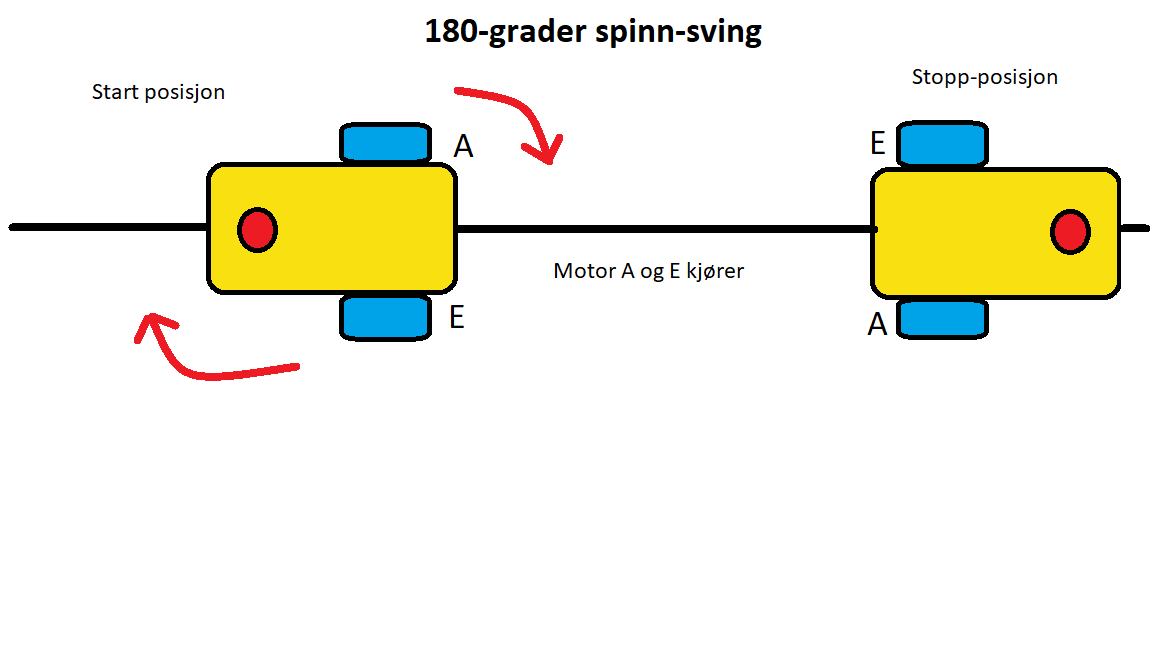

## Vente til gyro-sensoren har oppnådd ønsket verdi
Det er to muligheter for å måle om gyrosensoren har oppnådd verdien du ønsker.

### Mulighet 1: LEGO-API
For å bruke denne muligheten må du bruke operator-funksjoner i Spike-programmet. Dette importerer du øverst i programmet ditt:

In [ ]:
from spike.operator import greater_than_or_equal_to, equal_to

wait_until(get_value_function, operator_function =<function_equal_to>, target_value=True)

Denne metoden er kanskje den enkleste å bruke

### Mulighet 2: Python-API
Her kan dy bruke en while-løkke:

In [ ]:
start moving...
while(hub.motion_sensor.get_yaw_angle() < ANGLE):
    <code>
stop moving...

Denne metoden gjør det lettere å kjøre kode imens man venter. Om man ikke vil kjøre kode, så kan man sette inn pass i stedet for <code> for å hoppe over hver kjøring av løkka.

## Oppgave 1

Skriv et program som gjør at roboten svinger 90-grader ved dreiing.

Pseudokode

<li> Importer opeartorfunksjoner</li>
<li> Konfigurer kjøringen til roboten </li>
<li> La roboten svinge sakte til høyre ved å sett på den venstre motoren </li>
<li> Nullstill gyro-sensoren til 0</li>
<li> Vent til gyro-sensoren oppnår ønsket grader</li>
<li> Stopp motorene</li>

#### Løsningsforslag

In [ ]:
# Importerer operatorfunksjoner
from spike.operator import greater_than_or_equal_to

# Konfigurerer kjøringen
motor_pair = MotorPair('A','E')
motor_pair.set_stop_action('brake')

# Roboten svinger sakte med venstre motor
motor_pair.start_tank(20,0)

# Nullstiller gyro
hub.motion_sensor.reset_yaw_angle()

# Venter til gyroen har oppnådd 90-grader
wait_until(hub.motion_sensor.get_yaw_angle, greater_than_or_equal_to, 90)

#Stopper roboten
motor_pair.stop()

Linje 15 i dette programmet kan erstattes med:

In [ ]:
while (hub.motion_sensor.get_yaw_angle() < 90): pass

## Svinge høyre vs svinge venstre

For å endre retning på sving må du:

<li> Endre hvilket hjul som skal svinge</li>
<li> Vinkelen bør være -90 grader i stedet for 90 grader</li>
<li> wait_until-funksjonen må også endre seg til less_than_or_equal_to.</li>
<li> Bruker du while-løkke må den endre på seg til while (....angle() >-90):pass</li>

### Høyre sving

In [ ]:
motor_pair.start_tank(20,0)
hub.motion_sensor.reset_yaw_angle()
wait_until(hub.motion_sensor.get_yaw_angle, greater_than_or_equal_to, 90)
motor_pair.stop()

### Venstre sving

In [ ]:
motor_pair.start_tank(0,20)
hub.motion_sensor.reset_yaw_angle()
wait_until(hub.motion_sensor.get_yaw_angle, less_than_or_equal_to, -90)
motor_pair.stop()

## Utfordring 1

Roboten din skal kjøre rundt et rektangel, slik som vist på figuren under. Hvordan vil du programmere den for at den kan kjøre rundt alle sidene?
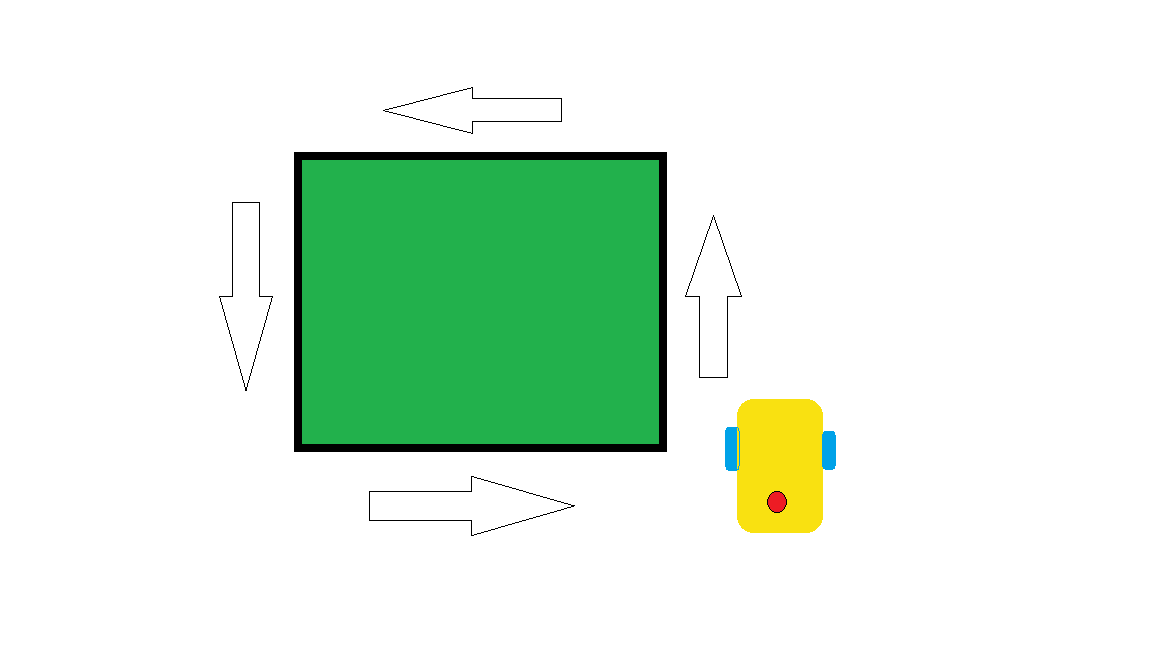

## Utfordring 2

Roboten din skal kjøre fra base 1 og snu 180 grader inne i base 2, før den kjører tilbake inn i base 1. Hvordan vil du programmere roboten din?
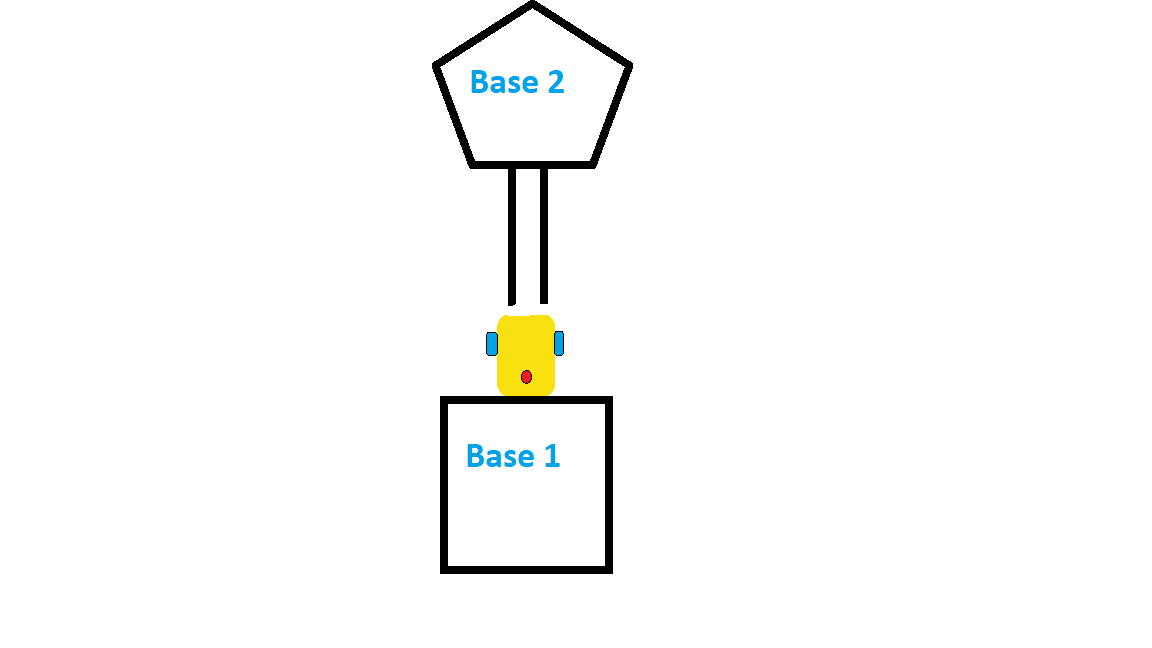